[Reference](https://nathanrosidi.medium.com/matplotlib-alternatives-that-actually-save-you-time-75631616cc4e)

# 1. Plotly — Interactive and Web-Ready Visualization

In [3]:
import matplotlib.pyplot as plt

# Color mapping based on property type
color_map = {'Residential': 'skyblue', 'Commercial': 'darkgreen', 'Industrial': 'gray'}
colors = df['category'].map(color_map)

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['investment_return'], df['market'], s=df['market_size']*10, c=colors, alpha=0.6, edgecolors='w', linewidth=0.5)

plt.title('Investment Returns of Different Real Estate Markets')
plt.xlabel('Investment Return (%)')
plt.ylabel('Market')
plt.grid(True)

# Adding legend manually
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Residential'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkgreen', markersize=10, label='Commercial'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Industrial')
], title='Property Type', loc='upper right')

plt.show()

In [4]:
import plotly.express as px

# Using Plotly Express to create the bubble chart
fig = px.scatter(df,
                 x='investment_return',
                 y='market',
                 size='market_size',
                 color='category',
                 color_discrete_map={'Residential': 'skyblue', 'Commercial': 'darkgreen', 'Industrial': 'gray'},
                 labels={'investment_return': 'Investment Return (%)',
                         'market': 'Market',
                         'market_size': 'Market Size'},
                 title='Investment Returns of Different Real Estate Markets')

fig.show()

# 2. Seaborn — Matplotlib’s Statistical Extension

Built on top of Matplotlib, seaborn automates complex statistical plotting like regression lines, heat maps, and distribution plots.

# 3. Vega-Altair — Declarative, Grammar-Based Visualization

Vega-Altair is a declarative visualization library for those who prioritize simplicity and scalability.

# 4. Bokeh — Web-Optimized for Large Datasets

In [5]:
# Step 1: Import necessary libraries
from bokeh.layouts import column
from bokeh.plotting import figure, curdoc
from bokeh.models import Slider
import numpy as np

# Step 2: Create the figure (plot)
plot = figure(title="Interactive Sine Wave Plot", x_axis_label='X', y_axis_label='Y', width=800, height=400)

# Step 3: Generate initial data
x = np.linspace(0, 10, 500)
y = np.sin(x)

# Step 4: Create a line renderer
line = plot.line(x, y, line_width=2)

# Step 5: Define a callback function to update the plot based on the slider value
def update_plot(attr, old, new):
    frequency = slider.value
    new_y = np.sin(frequency * x)
    line.data_source.data['y'] = new_y  # Update the y-values in the plot

# Step 6: Create a slider widget to control the frequency of the sine wave
slider = Slider(start=1, end=10, value=1, step=0.1, title="Frequency")
slider.on_change('value', update_plot)

# Step 7: Arrange the plot and slider in a layout
layout = column(slider, plot)

# Step 8: Add the layout to the current document for display in the browser
curdoc().add_root(layout)

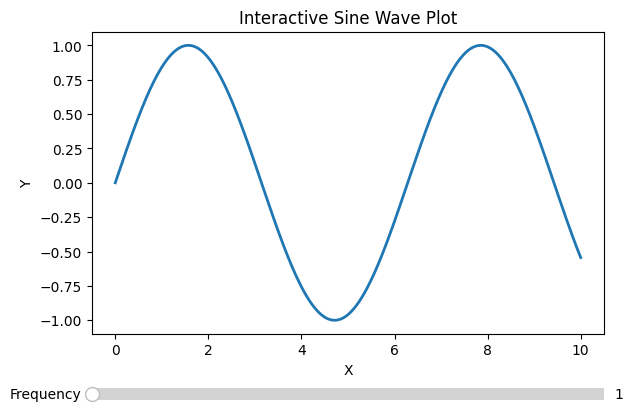

In [6]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Step 2: Create the figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.25)  # Adjust the subplot to make space for the slider

# Step 3: Generate initial data
x = np.linspace(0, 10, 500)
y = np.sin(x)

# Step 4: Plot the sine wave
line, = ax.plot(x, y, lw=2)
ax.set_title("Interactive Sine Wave Plot")
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Step 5: Create the slider axes and Slider widget
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Frequency', 1, 10, valinit=1, valstep=0.1)

# Step 6: Define a callback function to update the plot based on the slider value
def update(val):
    frequency = slider.val
    line.set_ydata(np.sin(frequency * x))  # Update the y-data of the line
    fig.canvas.draw_idle()  # Redraw the plot with updated data

# Step 7: Connect the update function to the slider
slider.on_changed(update)

# Step 8: Display the plot
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display

# Enable the interactive Matplotlib backend
%matplotlib widget

# Create the plot
x = np.linspace(0, 10, 500)
y = np.sin(x)
fig, ax = plt.subplots()
line, = ax.plot(x, y)

# Update function for the slider
def update(frequency=1):
    line.set_ydata(np.sin(frequency * x))
    ax.relim()  # Recalculate limits for updated data
    ax.autoscale_view()  # Autoscale for new data
    fig.canvas.draw_idle()  # Update the figure canvas

# Create the slider
_ = interact(update, frequency=(1, 10, 0.1))  # Suppress output